# Clustering : Performance Evaluation of k-means and DBscan algorithms

In [1]:
import pandas as pd
import pathlib
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")
# Create folder if it does not exist
pathlib.Path('output').mkdir(exist_ok=True)

In [3]:
# support function to plot clusters
def plot_cluster(df_x, df_y, df_class, file_path=None, x_label='x', y_label='y', title='clustering',
                 centers=None, plot=None):
    fig, ax = plt.subplots()
    cluster_plot = ax.scatter(df_x, df_y, c=df_class, s=40, alpha=0.6, marker='o', cmap='brg')
    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], marker='s',
                   c="white", alpha=1, s=75, edgecolor='black')
        for i, c in enumerate(centers):
            ax.scatter(c[0], c[1], marker='$%d$' % i, s=40, alpha=1, edgecolor='r')

    # plot labels, title and legends
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    legend = ax.legend(*cluster_plot.legend_elements(), title="classes",
                       bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.add_artist(legend)
    plt.tight_layout()
    if plot is not None:
        plt.show()
    if file_path:
        print('saving plot of resultant cluster into', file_path)
        fig.savefig(file_path, bbox_inches='tight')


## k-means clustering

Read the csv data...


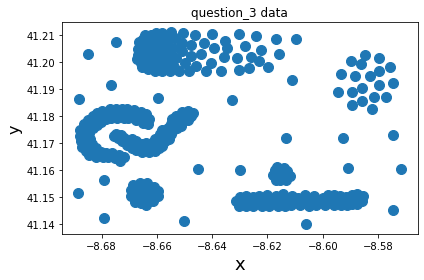

In [4]:
# Read csv data
print('Read the csv data...')
df = pd.read_csv('specs/data.csv')

# details of data
# # df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 322 entries, 0 to 321
# Data columns (total 3 columns):
#  #   Column  Non-Null Count  Dtype
# ---  ------  --------------  -----
#  0   ID      322 non-null    int64
#  1   x       322 non-null    float64
#  2   y       322 non-null    float64

# plot data
df.plot(kind='scatter',x='x', y='y', s=100, alpha=1, marker='o', cmap='brg')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.title('question_3 data')
plt.tight_layout()
plt.show()

In [5]:
# Discard the column ID from dataframe
df.drop(['ID'], axis=1, inplace=True)

### k-means clustering model: clusters=7, random state=0, runs=5, optimization steps=100

run kmeans on data in data : n_clusters=7, random_state=0, n_init=5...
saving plot of resultant cluster into output/data_1.pdf


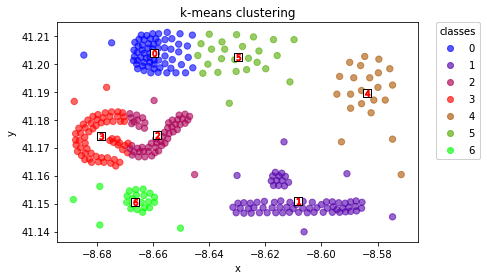

In [6]:
kmeans_1 = KMeans(n_clusters=7, random_state=0, n_init=5, max_iter=100)
print('run kmeans on data in data : n_clusters=7, random_state=0, n_init=5...')
df['kmeans'] = kmeans_1.fit_predict(df)

# 2 save plot of clusters in pdf file
center_list = kmeans_1.cluster_centers_
plot_cluster(df['x'], df['y'], df['kmeans'], "output/data_1.pdf",
             x_label='x', y_label='y', title='k-means clustering',
             centers=center_list)

### DBscan

#### Data Preprocessing - Scaling

In [7]:
# Min-Max transformation of attribute 'x' and 'y'
df['x'] = MinMaxScaler(feature_range=[0.0, 1.0]).fit_transform(df[['x']])
df['y'] = MinMaxScaler(feature_range=[0.0, 1.0]).fit_transform(df[['y']])

### DBscan clustering model: epsilon=0.04, minimum points for neighborhood evaluation=4

run DBSCAN on data in data : epsilon=0.04, minimum points for neighborhood evaluation=4...
saving plot of resultant cluster into output/data_2.pdf


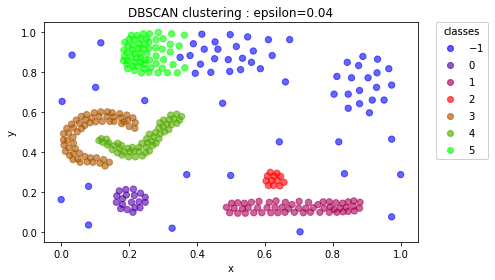

In [8]:
dbscan_3 = DBSCAN(eps=0.04, min_samples=4)
print('run DBSCAN on data in data : epsilon=0.04, minimum points for neighborhood evaluation=4...')
df['dbscan1'] = dbscan_3.fit_predict(df.drop(['kmeans'], axis=1))

# save plot of clusters in pdf file
# center_list = dbscan_3.cluster_centers_
plot_cluster(df['x'], df['y'], df['dbscan1'], "output/data_2.pdf",
             x_label='x', y_label='y', title='DBSCAN clustering : epsilon=0.04')

### DBscan clustering model: epsilon=0.08, minimum points for neighborhood evaluation=4

run DBSCAN on data in data : epsilon=0.08, minimum points for neighborhood evaluation=4...
saving plot of resultant cluster into output/data_3.pdf


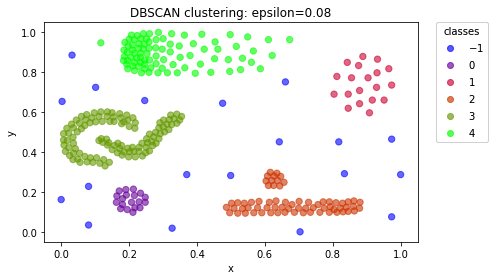

In [9]:
dbscan_4 = DBSCAN(eps=0.08, min_samples=4)
print('run DBSCAN on data in data : epsilon=0.08, minimum points for neighborhood evaluation=4...')
df['dbscan2'] = dbscan_4.fit_predict(df.drop(['kmeans', 'dbscan1'], axis=1))

# save plot of clusters in pdf file
# center_list = dbscan_3.cluster_centers_
plot_cluster(df['x'], df['y'], df['dbscan2'], "output/data_3.pdf",
             x_label='x', y_label='y', title='DBSCAN clustering: epsilon=0.08'
             )

#### save resultant data with assigned clusters

In [10]:
print('save data with assigned cluster to output/data.csv...')
df.to_csv('output/data.csv', index=False)


save data with assigned cluster to output/data.csv...


### Scoring algorithm performance

In [11]:


# 6 silhouette_score metric of classification is calculated to measure effectiveness of classification
print('silhouette_score - K-MEANS n_clusters=7, random_state=0, n_init=5, max_iter=100 : {:.4f}'.format(
    silhouette_score(df.iloc[:,:-3], df[['kmeans']])))
print('silhouette_score - DBSCAN epsilon=0.04, minimum points for neighborhood evaluation=4 : {:.4f}'.format(
    silhouette_score(df.iloc[:,:-3], df[['dbscan1']])))
print('silhouette_score - DBSCAN epsilon=0.08, minimum points for neighborhood evaluation=4 : {:.4f}'.format(
    silhouette_score(df.iloc[:,:-3], df[['dbscan2']])))

# 7 calinski_harabasz_score metric of classification is calculated to measure effectiveness of classification
print('calinski_harabasz_score - K-MEANS n_clusters=7, random_state=0, n_init=5, max_iter=100 : {:.4f}'.format(
    calinski_harabasz_score(df.iloc[:,:-3], df[['kmeans']])))
print('calinski_harabasz_score - DBSCAN epsilon=0.04, minimum points for neighborhood evaluation=4 : {:.4f}'.format(
    calinski_harabasz_score(df.iloc[:,:-3], df[['dbscan1']])))
print('calinski_harabasz_score - DBSCAN epsilon=0.08, minimum points for neighborhood evaluation=4 : {:.4f}'.format(
    calinski_harabasz_score(df.iloc[:,:-3], df[['dbscan2']])))


silhouette_score - K-MEANS n_clusters=7, random_state=0, n_init=5, max_iter=100 : 0.5127
silhouette_score - DBSCAN epsilon=0.04, minimum points for neighborhood evaluation=4 : 0.3266
silhouette_score - DBSCAN epsilon=0.08, minimum points for neighborhood evaluation=4 : 0.5273
calinski_harabasz_score - K-MEANS n_clusters=7, random_state=0, n_init=5, max_iter=100 : 628.3417
calinski_harabasz_score - DBSCAN epsilon=0.04, minimum points for neighborhood evaluation=4 : 175.9705
calinski_harabasz_score - DBSCAN epsilon=0.08, minimum points for neighborhood evaluation=4 : 324.8635
